# Title
This Jupyter Notebook is related to the article "Finding our way through a random forest" published in Medium. This article presents a description of Decision Trees and Random Forests using a Zombie Apocalypse story. Here you will find a practical exercise that is mentioned in the article. For more information about this, read the article and the references at the end of this notebook.

### Important Concepts
**Decision tree learning** is a supervised learning approach used in statistics, data mining and machine learning. In this formalism, a classification or regression decision tree is used as a predictive model to draw conclusions about a set of observations. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity (copied from [Wikipedia: Decision tree learning](https://en.wikipedia.org/wiki/Decision_tree_learning))

**Random Forests** is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. Random forests are frequently used as black box models in businesses, as they generate reasonable predictions across a wide range of data while requiring little configuration (copied from [Wikipedia: Random forest](https://en.wikipedia.org/wiki/Random_forest)).

## Libraries
These are the libraries that will be used in this notebook:
- Decision trees and Random Forest classifier from sklearn
- Matplotlib
- Pandas
- NumPy
- Train/Test split, confusion matrix and accuracy score from sklearn
- Random to keep results consistent

In [1]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import random

## Example 1
The first example from the Medium article corresponds to a sample of 15 people with different characteristics and different outcomes in terms of their survival in the Zombie Apocalypse. In the article, this data is used to build a Decision Tree by hand. In this case, the Decision Tree is built using the libraries mentioned previously.

### Step 1. Load the dataset
The samples are saved in the first sheet of the Excel file `Data_RF.xlsx`.

In [2]:
# Load the data using pandas and save it on E1_pd
E1_pd=pd.read_excel('Data_RF.xlsx',sheet_name="Example1")
E1_pd

,Alone?,Trained to Fight?,Vehicle?,Weapon?,Survive?
0,YES,YES,YES,YES,NO
1,YES,NO,NO,NO,NO
2,NO,YES,NO,NO,YES
3,YES,NO,NO,YES,NO
4,NO,YES,YES,YES,YES
5,NO,YES,NO,YES,YES
6,NO,NO,YES,NO,NO
7,YES,NO,NO,NO,NO
8,YES,YES,YES,YES,NO
9,YES,NO,NO,YES,NO


There are 15 entries with different features and a final column that contains the final status. It is necessary to convert this `YES/NO` variables into a numerical variable. In the next instruction the `YES` will be converted into +1 and the `NO` will be converted into -1

In [3]:
E1_pd[['Alone?', 'Trained to Fight?', 'Vehicle?', 'Weapon?', 'Survive?']] = E1_pd[['Alone?', 'Trained to Fight?', 'Vehicle?', 'Weapon?', 'Survive?']].apply(lambda x: [1 if i == 'YES' else -1 for i in x])
E1_pd

,Alone?,Trained to Fight?,Vehicle?,Weapon?,Survive?
0,1,1,1,1,-1
1,1,-1,-1,-1,-1
2,-1,1,-1,-1,1
3,1,-1,-1,1,-1
4,-1,1,1,1,1
5,-1,1,-1,1,1
6,-1,-1,1,-1,-1
7,1,-1,-1,-1,-1
8,1,1,1,1,-1
9,1,-1,-1,1,-1


### Step 2. Separate the dataset into an input and output set
The array `X_E1` will contain the first 4 columns (input) and the array `Y_E1` will contain the final column with the output

In [4]:
X_E1=E1_pd.iloc[:,0:4].to_numpy()
Y_E1=E1_pd.iloc[:,-1].to_numpy()

### Step 3. Train a Decision Tree
The function `tree.DecisionTreeClassifier` will be used to train the Decision Tree using `X_E1` and `Y_E1`.

In [5]:
DT_E1 = tree.DecisionTreeClassifier(random_state=1, criterion="entropy", min_samples_leaf=1)
DT_E1 = DT_E1.fit(X_E1, Y_E1)

### Step 4. Plot the Decision Tree
Use the function `plot_tree` to generate a picture of the Decision Tree. This picture can be compared with the one that is shown in the Medium article. 

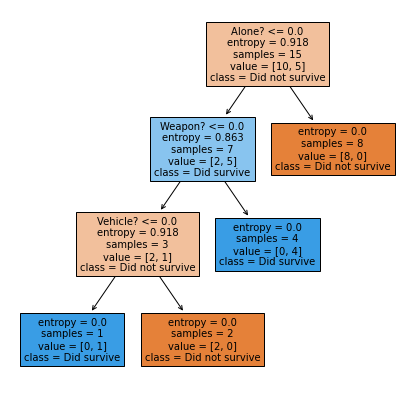

In [6]:
plt.figure(figsize=(7,7))  # set plot size (denoted in inches)
tree.plot_tree(DT_E1, fontsize=10, filled=True,class_names=(['Did not survive','Did survive']),feature_names=['Alone?','Trained to Fight?','Vehicle?','Weapon?'])
plt.show()

## Example 2
This is a more complete example in which the dataset consists of more than 1000 entries. Both the Decision Trees and Random Forests methodologies will be used to analyze this example.

### Step 1. Load the dataset
The samples are saved in the second sheet of the Excel file `Data_RF.xlsx`.

In [7]:
# Load the data using pandas and save it on E2_pd
E2_pd=pd.read_excel('Data_RF.xlsx',sheet_name="Example2")
E2_pd

,Alone?,Trained to Fight?,Vehicle?,Weapon?,Radio?,Food?,Survival Training?,First Aid?,Zombie Encounter?,GPS?,Survive?
0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
2,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO
3,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO
4,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
1019,YES,YES,NO,YES,YES,YES,YES,YES,YES,YES,YES
1020,NO,NO,YES,YES,YES,YES,YES,YES,YES,YES,YES
1021,YES,NO,YES,YES,YES,YES,YES,YES,YES,YES,YES
1022,NO,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES


A similar conversion between categorical and numerical values is done with the dataset

In [8]:
E2_pd[['Alone?', 'Trained to Fight?', 'Vehicle?', 'Weapon?', 'Survive?','Radio?','Food?','Survival Training?','First Aid?','Zombie Encounter?','GPS?']] = E2_pd[['Alone?', 'Trained to Fight?', 'Vehicle?', 'Weapon?', 'Survive?','Radio?','Food?','Survival Training?','First Aid?','Zombie Encounter?','GPS?']].apply(lambda x: [1 if i == 'YES' else -1 for i in x])
E2_pd

,Alone?,Trained to Fight?,Vehicle?,Weapon?,Radio?,Food?,Survival Training?,First Aid?,Zombie Encounter?,GPS?,Survive?
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
1019,1,1,-1,1,1,1,1,1,1,1,1
1020,-1,-1,1,1,1,1,1,1,1,1,1
1021,1,-1,1,1,1,1,1,1,1,1,1
1022,-1,1,1,1,1,1,1,1,1,1,1


### Step 2. Separate the dataset into an input and output set and into a training and testing set
The array `X_E2` will contain the first 4 columns (input) and the array `Y_E2` will contain the final column with the output.
In addition to this, the input and output data will be divided into a training and testing set:
- Training set: `X_E2_Train` and `Y_E2_Train`
- Testing set: `X_E2_Test` and `Y_E2_Test`

In [9]:
#Input and Output
X_E2=E2_pd.iloc[:,0:10].to_numpy()
Y_E2=E2_pd.iloc[:,-1].to_numpy()

#Training and testing
X_E2_train, X_E2_test, Y_E2_train, Y_E2_test=train_test_split(X_E2,Y_E2,test_size=0.2,random_state=23)

These are the number of training and testing samples:

In [10]:
print('Training samples: ',X_E2_train.shape[0])
print('Testing samples: ',X_E2_test.shape[0])

Training samples:  819
Testing samples:  205


### Step 3. Train and evaluate a Decision Tree
The training dataset is used to build a Decision Tree

In [11]:
DT_E2 = tree.DecisionTreeClassifier(random_state=15, criterion="entropy", min_samples_leaf=1)
DT_E2 = DT_E2.fit(X_E2_train, Y_E2_train)

The diagram for the Decision Tree looks like this:

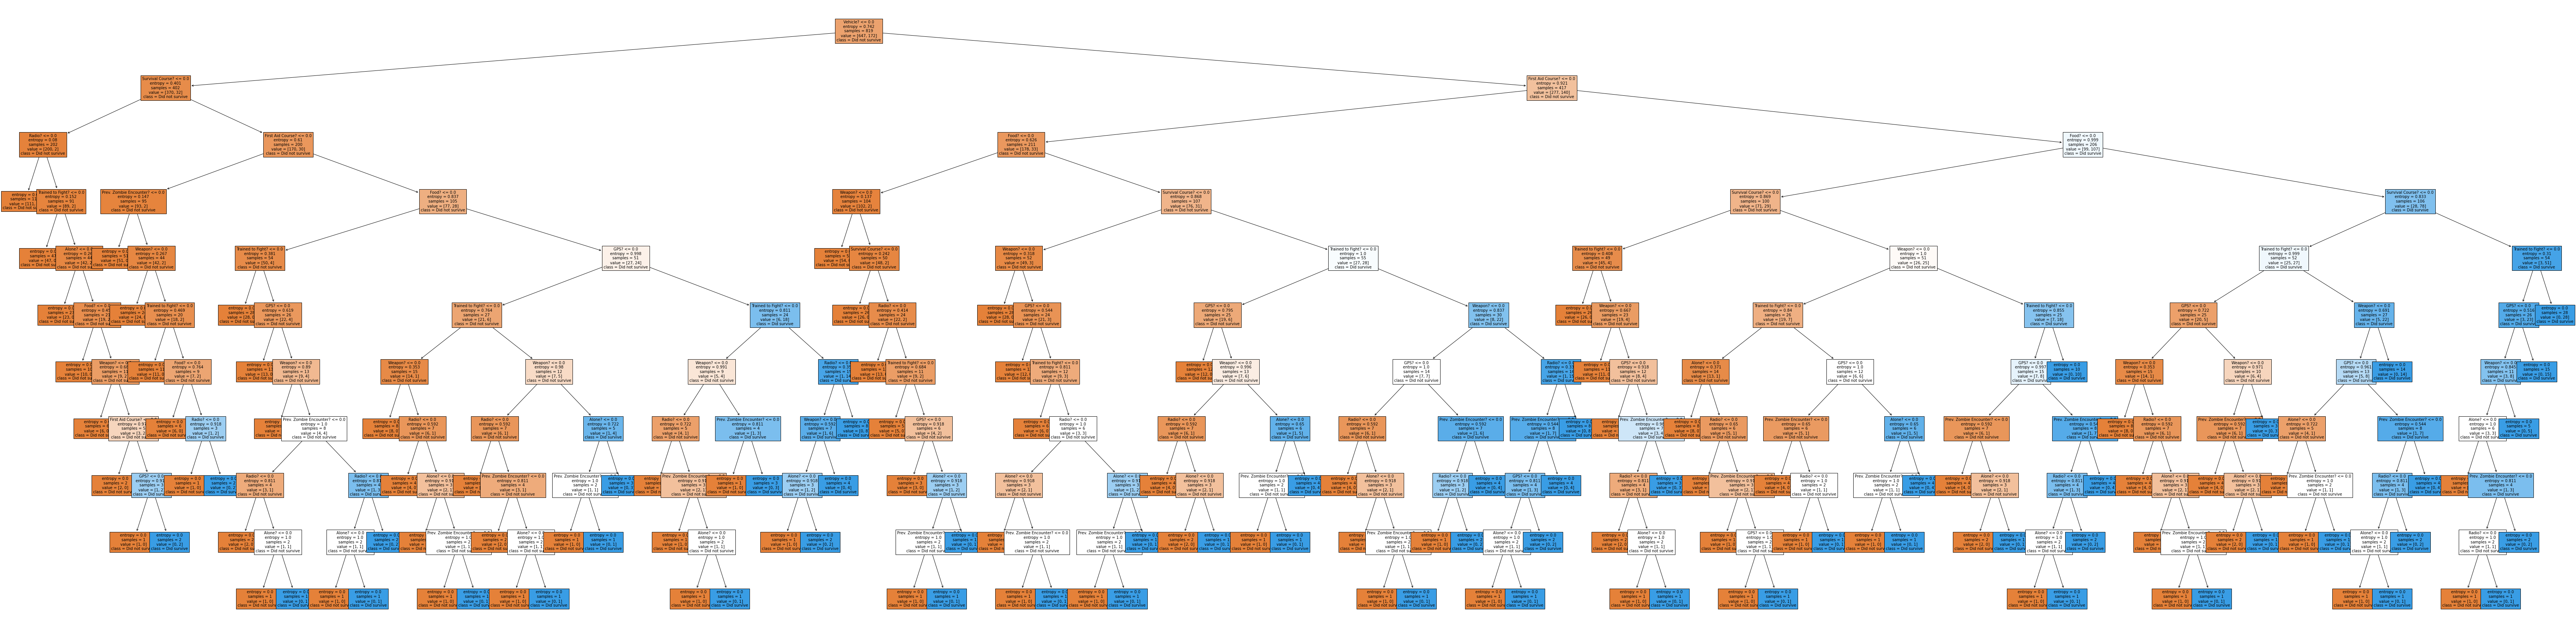

In [12]:
plt.figure(figsize=(120,30))  # set plot size (denoted in inches)
tree.plot_tree(DT_E2, fontsize=10, filled=True,class_names=(['Did not survive','Did survive']),feature_names=['Alone?','Trained to Fight?','Vehicle?','Weapon?','Radio?','Food?','Survival Course?','First Aid Course?','Prev. Zombie Encounter?','GPS?'])
plt.show()

Using a confusion matrix it is possible to evaluate the Decision Tree and quantify how many entries were not correctly classified. It is also possible to get a prediction accuracy score for the testing dataset:

In [13]:
#CONFUSION MATRIX
print('Confusion matrix for the training dataset')
pred_DT_E2_train=DT_E2.predict(X_E2_train)
print(confusion_matrix(Y_E2_train, pred_DT_E2_train))

print('Confusion matrix for the testing dataset')
pred_DT_E2_test=DT_E2.predict(X_E2_test)
print(confusion_matrix(Y_E2_test, pred_DT_E2_test))

print(f'Prediction accuracy score for the testing dataset: {accuracy_score(Y_E2_test, pred_DT_E2_test)}')

Confusion matrix for the training dataset
[[647   0]
 [  0 172]]
Confusion matrix for the testing dataset
[[154  11]
 [ 15  25]]
Prediction accuracy score for the testing dataset: 0.8731707317073171


### Step 4. Train and evaluate a Random Forest
The training dataset is used to build a Random Forest. In this case, the Random Forest contains 10 decision trees with a maximum number of samples of 682 and a maximum number of features of $\sqrt10\approx3$

In [14]:
RF=RandomForestClassifier(random_state=5926, n_estimators=10, criterion='entropy', min_samples_leaf=1, max_samples=682)
RF=RF.fit(X_E2_train,Y_E2_train)

It is not possible to plot a single diagram that represents all the decision trees in the random forest. However, it is possible to plot each individual decision tree.
The confusion matrices and prediction accuracy score for the Random Forest are the following:

In [15]:
print('Confusion matrix for the training dataset')
pred_RF_train=RF.predict(X_E2_train)
print(confusion_matrix(Y_E2_train, pred_RF_train))

print('Confusion matrix for the testing dataset')
pred_RF_test=RF.predict(X_E2_test)
print(confusion_matrix(Y_E2_test, pred_RF_test))

print(f'Prediction accuracy score for the testing dataset: {accuracy_score(Y_E2_test, pred_RF_test)}')

Confusion matrix for the training dataset
[[645   2]
 [  9 163]]
Confusion matrix for the testing dataset
[[163   2]
 [  9  31]]
Prediction accuracy score for the testing dataset: 0.9463414634146341


## Conclusion
This notebook contains just a very brief and simple example of how to work with Decision Trees and Random Forests. There are many things related to both the theoretical and practical aspects of these methods that were not covered here. It is recommended to go through the references and the sklearn documentation to know more about these methods and their applications.

## References
- [Random Forest. Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [Decision Trees. Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)
- [Random Forests. Leo Breiman and Adele Cutler](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm)
- Louppe, Gilles (2014). Understanding Random Forests. PhD dissertation. University of Liege